In [ ]:
# Main Libraries to install
!pip install plotly
!pip install mlxtend
!pip install seaborn
!pip install wordcloud

# Note: Graphs may take a lot of time to load because of the size of the data. 

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Groceries_dataset.csv')

In [3]:
data.shape

(38765, 3)

In [4]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

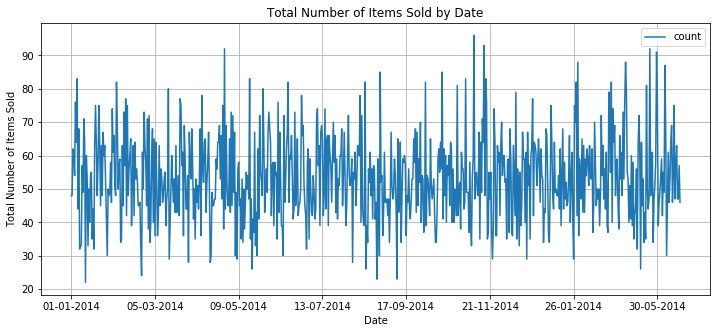

In [6]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [7]:
d = data.set_index(['Date'])

In [8]:
d

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [9]:
d.index = pd.to_datetime(d.index)

In [11]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

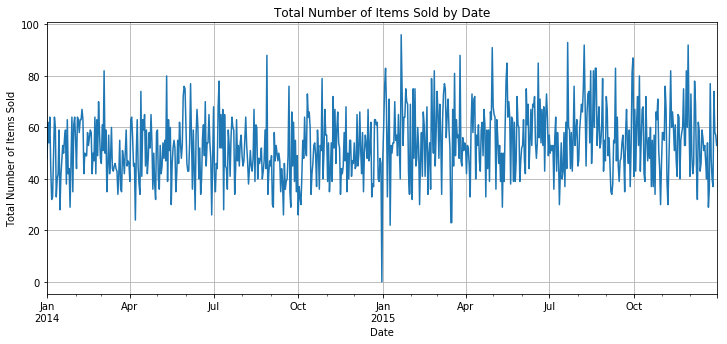

In [12]:
d.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

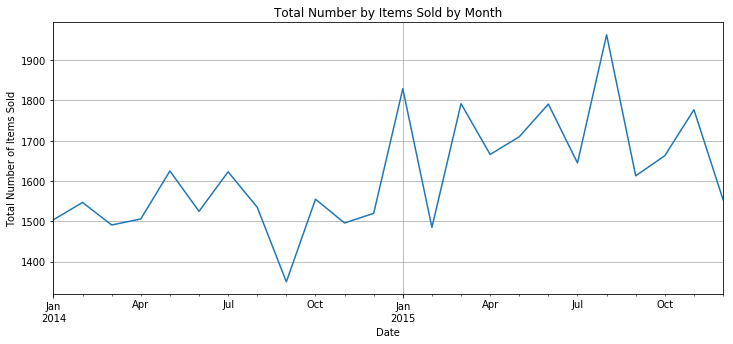

In [13]:
d.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [14]:
d["Hour"] = d.index.hour
d["Weekday"] = d.index.weekday + 1

d.head(10)

,Member_number,itemDescription,Hour,Weekday
Date,,,,
2015-07-21,1808,tropical fruit,0,2
2015-05-01,2552,whole milk,0,5
2015-09-19,2300,pip fruit,0,6
2015-12-12,1187,other vegetables,0,6
2015-01-02,3037,whole milk,0,5
2015-02-14,4941,rolls/buns,0,6
2015-08-05,4501,other vegetables,0,3
2015-12-23,3803,pot plants,0,3
2015-03-20,2762,whole milk,0,5


In [15]:
data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

In [16]:
data['Date'].nunique()

728

In [17]:
import plotly.express as px

In [19]:
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()

In [20]:
bar_plot(data, 'itemDescription')

In [21]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)

In [22]:
df

Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object

In [23]:
df.values

array(['sausagewhole milksemi-finished breadyogurt',
       'whole milkpastrysalty snack', 'canned beermisc. beverages', ...,
       'fruit/vegetable juiceonions',
       'sodaroot vegetablessemi-finished bread',
       'bottled beerother vegetables'], dtype=object)

In [25]:
pd.set_option('display.max_colwidth', -1)

ipykernel_launcher:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [27]:
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]

In [28]:
transactions

erries', 'white bread'],
 ['rolls/buns', 'soda'],
 ['chicken', 'brown bread'],
 ['other vegetables', 'napkins'],
 ['newspapers', 'soups'],
 ['UHT-milk', 'soda'],
 ['pork', 'soda'],
 ['oil', 'pickled vegetables'],
 ['soda', 'whole milk', 'whole milk', 'sugar'],
 ['misc. beverages', 'spread cheese'],
 ['meat', 'whole milk'],
 ['pork', 'domestic eggs'],
 ['root vegetables', 'coffee'],
 ['canned beer', 'fish'],
 ['hard cheese', 'root vegetables', 'white bread'],
 ['chicken', 'domestic eggs', 'white bread'],
 ['soda', 'whipped/sour cream'],
 ['brown bread', 'other vegetables'],
 ['tropical fruit', 'root vegetables'],
 ['bottled beer', 'soda'],
 ['whole milk', 'bottled beer'],
 ['bottled water', 'shopping bags', 'waffles'],
 ['pork', 'margarine'],
 ['frozen vegetables', 'pip fruit', 'root vegetables', 'cereals'],
 ['yogurt', 'soda', 'yogurt'],
 ['other vegetables', 'berries', 'candy', 'sliced cheese'],
 ['curd', 'soft cheese'],
 ['soda', 'whole milk'],
 ['frozen meals', 'detergent'],
 ['spec

In [29]:
from mlxtend.preprocessing import TransactionEncoder

In [30]:
te = TransactionEncoder()

In [31]:
te_ary = te.fit(transactions).transform(transactions)

In [32]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [33]:
te_ary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()

In [35]:
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [36]:
pf.iloc[0] - pf.iloc[3]

Instant food products    60  
UHT-milk                 320 
abrasive cleaner         22  
artif. sweetener         29  
baby cosmetics           3   
                        ..   
white bread              359 
white wine               175 
whole milk               2363
yogurt                   1285
zwieback                 60  
Length: 167, dtype: object

In [37]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
item

,Count,Item
164,2363,whole milk
102,1827,other vegetables
122,1646,rolls/buns
138,1453,soda
165,1285,yogurt
123,1041,root vegetables
156,1014,tropical fruit
12,908,bottled water
130,903,sausage
30,795,citrus fruit


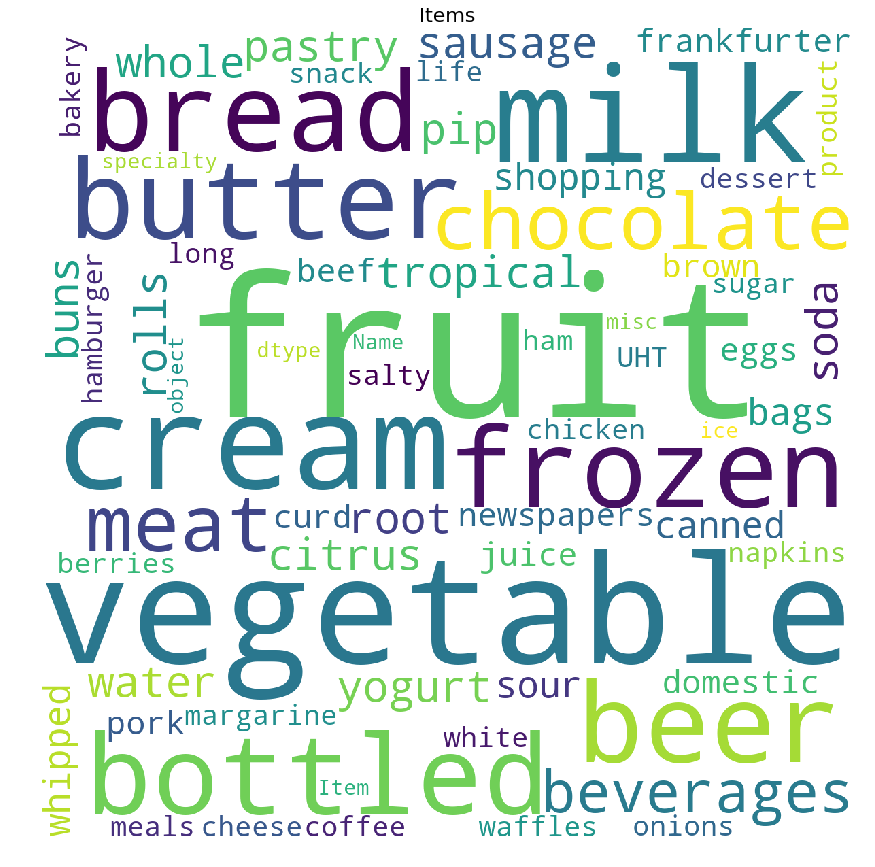

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [40]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [42]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 28 combinations | Sampling itemset size 4


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


In [43]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [44]:
freq_items.head(10)

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
5,0.001136,(bathroom cleaner),1
6,0.033950,(beef),1
7,0.021787,(berries),1
8,0.016574,(beverages),1
9,0.045312,(bottled beer),1


In [45]:
freq_items.tail(10)

,support,itemsets,length
740,0.011161,"(yogurt, whole milk)",2
741,0.001136,"(soda, other vegetables, rolls/buns)",3
742,0.001203,"(whole milk, other vegetables, rolls/buns)",3
743,0.001136,"(whole milk, other vegetables, soda)",3
744,0.001136,"(yogurt, whole milk, other vegetables)",3
745,0.001136,"(whole milk, rolls/buns, sausage)",3
746,0.001002,"(soda, whole milk, rolls/buns)",3
747,0.001337,"(yogurt, whole milk, rolls/buns)",3
748,0.001069,"(soda, whole milk, sausage)",3
749,0.001470,"(yogurt, whole milk, sausage)",3


In [46]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934


In [48]:
fig=px.scatter(rules['support'], rules['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)
fig.show()

In [49]:
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')
    
)

fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

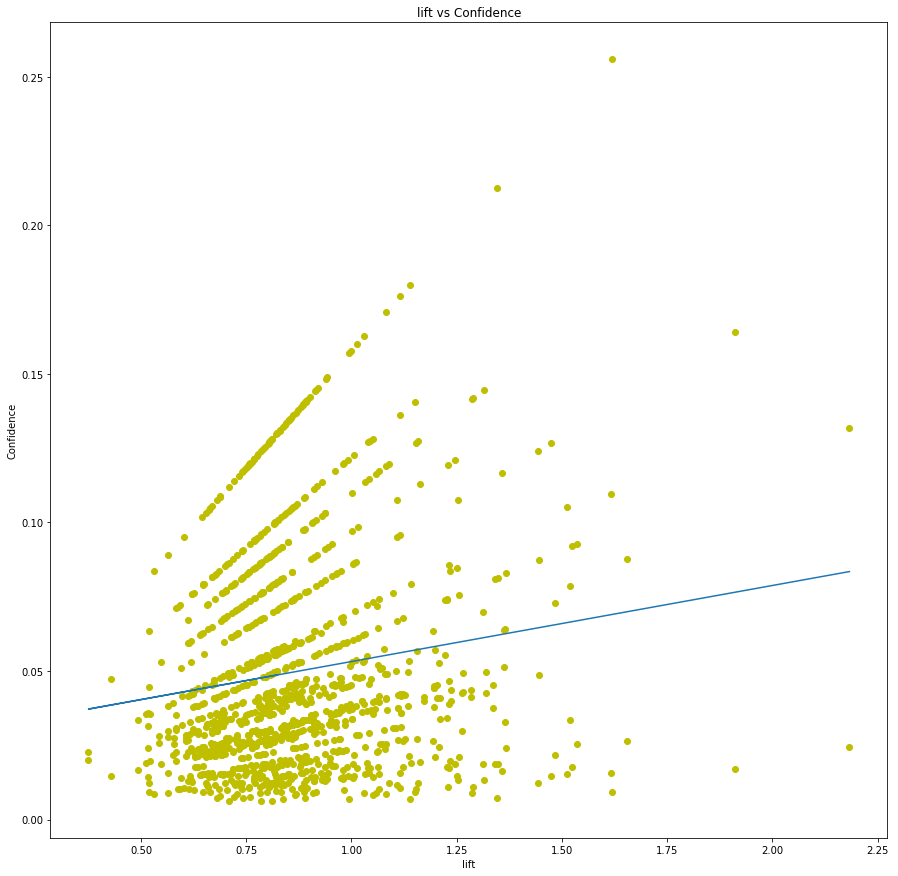

In [51]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')